In [50]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [79]:
from kaggle.competitions import nflrush

# You can only call make_env() once, so don't lose it!
#env = nflrush.make_env()

OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.

In [4]:
train_df = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2020/train.csv', low_memory=False)

# Understanding the data

In [5]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)
display_all(train_df)

,GameId,PlayId,Team,X,Y,S,A,Dis,Orientation,Dir,NflId,DisplayName,JerseyNumber,Season,YardLine,Quarter,GameClock,PossessionTeam,Down,Distance,FieldPosition,HomeScoreBeforePlay,VisitorScoreBeforePlay,NflIdRusher,OffenseFormation,OffensePersonnel,DefendersInTheBox,DefensePersonnel,PlayDirection,TimeHandoff,TimeSnap,Yards,PlayerHeight,PlayerWeight,PlayerBirthDate,PlayerCollegeName,Position,HomeTeamAbbr,VisitorTeamAbbr,Week,Stadium,Location,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed,WindDirection
0,2017090700,20170907000118,away,73.91,34.84,1.69,1.13,0.40,81.99,177.18,496723,Eric Berry,29,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,6-0,212,12/29/1988,Tennessee,SS,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
1,2017090700,20170907000118,away,74.67,32.64,0.42,1.35,0.01,27.61,198.70,2495116,Allen Bailey,97,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,6-3,288,03/25/1989,Miami,DE,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
2,2017090700,20170907000118,away,74.00,33.20,1.22,0.59,0.31,3.01,202.73,2495493,Justin Houston,50,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,6-3,270,01/21/1989,Georgia,DE,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
3,2017090700,20170907000118,away,71.46,27.70,0.42,0.54,0.02,359.77,105.64,2506353,Derrick Johnson,56,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,6-3,245,11/22/1982,Texas,ILB,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
4,2017090700,20170907000118,away,69.32,35.42,1.82,2.43,0.16,12.63,164.31,2530794,Ron Parker,38,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,6-0,206,08/17/1987,Newberry,FS,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682149,2019112500,20191125003789,home,69.58,31.33,4.19,1.33,0.43,92.32,20.94,2556593,Cory Littleton,58,2019,38,4,04:11:00,BLT,2,9,BLT,6,45,2562407,PISTOL,"1 RB, 1 TE, 3 WR",6.0,"3 DL, 3 LB, 5 DB",left,2019-11-26T03:59:06.000Z,2019-11-26T03:59:05.000Z,4,6-3,228,11/18/1993,Washington,ILB,LA,BAL,12,Los Angeles Memorial Coliseum,"Los Angeles, CA",Outdoor,Grass,Clear,62.0,64.0,5,WSW
682150,2019112500,20191125003789,home,72.16,25.09,1.01,1.40,0.08,65.83,76.48,2558199,Tanzel Smart,92,2019,38,4,04:11:00,BLT,2,9,BLT,6,45,2562407,PISTOL,"1 RB, 1 TE, 3 WR",6.0,"3 DL, 3 LB, 5 DB",left,2019-11-26T03:59:06.000Z,2019-11-26T03:59:05.000Z,4,6-1,295,11/06/1994,Tulane,DT,LA,BAL,12,Los Angeles Memorial Coliseum,"Los Angeles, CA",Outdoor,Grass,Clear,62.0,64.0,5,WSW
682151,2019112500,20191125003789,home,72.23,31.95,1.75,0.68,0.17,93.99,90.26,2558830,Samson Ebukam,50,2019,38,4,04:11:00,BLT,2,9,BLT,6,45,2562407,PISTOL,"1 RB, 1 TE, 3 WR",6.0,"3 DL, 3 LB, 5 DB",left,2019-11-26T03:59:06.000Z,2019-11-26T03:59:05.000Z,4,6-3,245,05/09/1995,Eastern Washington,OLB,LA,BAL,12,Los Angeles Memorial Coliseum,"Los Angeles, CA",Outdoor,Grass,Clear,62.0,64.0,5,WSW
682152,2019112500,20191125003789,home,72.08,26.74,0.70,1.59,0.07,61.47,48.34,2562391,Greg Gaines,91,2019,38,4,04:11:00,BLT,2,9,BLT,6,45,2562407,PISTOL,"1 RB, 1 TE, 3 WR",6.0,"3 DL, 3 LB, 5 DB",left,2019-11-26T03:59:06.000Z,2019-11-26T03:59:05.000Z,4,6-1,312,05/06/1996,Washington,DT,LA,BAL,12,Los Angeles Memoria

There are 22 rows for each Play ID, each row representing the 11 offensive and 11 defensive players on the field

### **What features are in the dataset?**

In [6]:
print(train_df.columns.values)

['GameId' 'PlayId' 'Team' 'X' 'Y' 'S' 'A' 'Dis' 'Orientation' 'Dir'
 'NflId' 'DisplayName' 'JerseyNumber' 'Season' 'YardLine' 'Quarter'
 'GameClock' 'PossessionTeam' 'Down' 'Distance' 'FieldPosition'
 'HomeScoreBeforePlay' 'VisitorScoreBeforePlay' 'NflIdRusher'
 'OffenseFormation' 'OffensePersonnel' 'DefendersInTheBox'
 'DefensePersonnel' 'PlayDirection' 'TimeHandoff' 'TimeSnap' 'Yards'
 'PlayerHeight' 'PlayerWeight' 'PlayerBirthDate' 'PlayerCollegeName'
 'Position' 'HomeTeamAbbr' 'VisitorTeamAbbr' 'Week' 'Stadium' 'Location'
 'StadiumType' 'Turf' 'GameWeather' 'Temperature' 'Humidity' 'WindSpeed'
 'WindDirection']


**Individual player-related values**: X, Y, S, A, Dis, Orientation, Dir, NflId, DisplayName, JerseyNumber, PlayerHeight, PlayerWeight, PlaterBirthDate, PlayerCollegeName, Position

**Condition-related values**: Location, StadiumType, Turf, GameWeather, Temperature, Humidity, WindSpeed, WindDirection

**Play-specific values**: Team (Home/Away), YardLine, Quarter, GameClock, PossessionTeam, Down, Distance, FieldPosition, HomeScoreBeforePlay, VisitorScoreBeforePlay, NflIdRusher, OffenseFormation,OffensePersonnel, DefendersInTheBox, DefensePersonnel, PlayDirection, TimeHandoff, TimeSnap, Yards 

**Game-related values**: Season,HomeTeamAbbr, VisitorTeamAbbr, Week, Stadium


### Which features contain null values?

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682154 entries, 0 to 682153
Data columns (total 49 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   GameId                  682154 non-null  int64  
 1   PlayId                  682154 non-null  int64  
 2   Team                    682154 non-null  object 
 3   X                       682154 non-null  float64
 4   Y                       682154 non-null  float64
 5   S                       682154 non-null  float64
 6   A                       682154 non-null  float64
 7   Dis                     682154 non-null  float64
 8   Orientation             682131 non-null  float64
 9   Dir                     682126 non-null  float64
 10  NflId                   682154 non-null  int64  
 11  DisplayName             682154 non-null  object 
 12  JerseyNumber            682154 non-null  int64  
 13  Season                  682154 non-null  int64  
 14  YardLine            

**Columns with null values:** Orientation, Dir, FieldPosition, OffenseFormation, DefendersInTheBox, StadiumType, GameWeather, Temperature, Humidity, WindSpeed, WindDirection

In [81]:
train_df.OffensePersonnel.unique()

array(['1 RB, 1 TE, 3 WR', '6 OL, 2 RB, 2 TE, 0 WR', '1 RB, 3 TE, 1 WR',
       '1 RB, 2 TE, 2 WR', '6 OL, 1 RB, 2 TE, 1 WR', '2 RB, 1 TE, 2 WR',
       '2 RB, 2 TE, 1 WR', '0 RB, 3 TE, 2 WR', '0 RB, 1 TE, 4 WR',
       '6 OL, 1 RB, 0 TE, 3 WR', '6 OL, 1 RB, 1 TE, 2 WR',
       '1 RB, 2 TE, 1 WR,1 DL', '1 RB, 3 TE, 0 WR,1 DL',
       '1 RB, 0 TE, 4 WR', '1 RB, 1 TE, 2 WR,1 DL',
       '6 OL, 2 RB, 0 TE, 2 WR', '2 RB, 0 TE, 3 WR',
       '6 OL, 2 RB, 1 TE, 1 WR', '7 OL, 1 RB, 0 TE, 2 WR',
       '7 OL, 2 RB, 0 TE, 1 WR', '7 OL, 1 RB, 2 TE, 0 WR',
       '2 RB, 3 TE, 0 WR', '3 RB, 1 TE, 1 WR', '6 OL, 1 RB, 3 TE, 0 WR',
       '6 OL, 1 RB, 2 TE, 0 WR,1 DL', '2 RB, 3 TE, 1 WR',
       '6 OL, 1 RB, 1 TE, 1 WR,1 DL', '1 RB, 4 TE, 0 WR',
       '1 RB, 2 TE, 1 WR,1 LB', '1 RB, 3 TE, 0 WR,1 LB',
       '7 OL, 2 RB, 1 TE, 0 WR', '0 RB, 2 TE, 3 WR',
       '1 RB, 0 TE, 3 WR,1 DB', '6 OL, 1 RB, 2 TE, 0 WR,1 LB',
       '1 RB, 1 TE, 2 WR,1 DB', '0 RB, 0 TE, 5 WR', '1 RB, 2 TE, 3 WR',
       '1 RB, 

In [56]:
train_df.DefensePersonnel.unique()

array(['2 DL, 3 LB, 6 DB', '4 DL, 4 LB, 3 DB', '3 DL, 2 LB, 6 DB',
       '3 DL, 4 LB, 4 DB', '3 DL, 3 LB, 5 DB', '4 DL, 3 LB, 4 DB',
       '4 DL, 1 LB, 6 DB', '4 DL, 2 LB, 5 DB', '5 DL, 2 LB, 4 DB',
       '2 DL, 4 LB, 5 DB', '2 DL, 5 LB, 4 DB', '5 DL, 4 LB, 2 DB',
       '1 DL, 5 LB, 5 DB', '5 DL, 3 LB, 3 DB', '6 DL, 2 LB, 3 DB',
       '3 DL, 5 LB, 3 DB', '6 DL, 3 LB, 2 DB', '1 DL, 3 LB, 7 DB',
       '2 DL, 2 LB, 7 DB', '4 DL, 5 LB, 2 DB', '1 DL, 4 LB, 6 DB',
       '4 DL, 5 LB, 1 DB, 1 OL', '6 DL, 1 LB, 4 DB',
       '2 DL, 4 LB, 4 DB, 1 OL', '6 DL, 4 LB, 1 DB', '5 DL, 1 LB, 5 DB',
       '4 DL, 6 LB, 1 DB', '0 DL, 5 LB, 6 DB', '5 DL, 4 LB, 1 DB, 1 OL',
       '3 DL, 1 LB, 7 DB', '4 DL, 0 LB, 7 DB', '3 DL, 4 LB, 3 DB, 1 OL',
       '5 DL, 5 LB, 1 DB', '5 DL, 3 LB, 2 DB, 1 OL', '0 DL, 6 LB, 5 DB',
       '1 DL, 2 LB, 8 DB', '0 DL, 4 LB, 7 DB', '7 DL, 2 LB, 2 DB',
       '0 DL, 4 LB, 6 DB, 1 RB', '1 DL, 4 LB, 5 DB, 1 RB',
       '2 DL, 4 LB, 4 DB, 1 RB', '2 DL, 3 LB, 5 DB, 1 RB',
 

During feature engineering, I want to split DefensePersonnel and OffensePersonnel into separate columns so I can see if having more players in one position compared to another affects the yardage of the run play

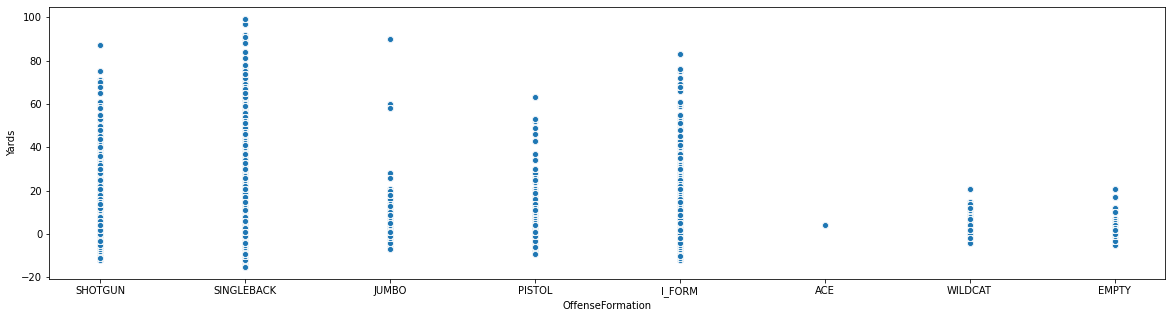

In [53]:
plt.figure(figsize=(20,5))
sns.scatterplot(x="OffenseFormation", y="Yards", data=train_df)

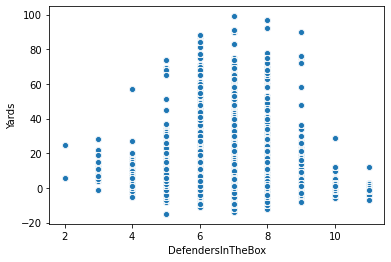

In [60]:
sns.scatterplot(x="DefendersInTheBox", y="Yards", data=train_df)

In [62]:
train_df.Position.unique()

array(['SS', 'DE', 'ILB', 'FS', 'CB', 'DT', 'WR', 'TE', 'T', 'QB', 'RB',
       'G', 'C', 'OLB', 'NT', 'FB', 'MLB', 'LB', 'OT', 'S', 'OG', 'HB',
       'DB', 'DL', 'SAF'], dtype=object)

Get only the rows where the Position is RB (Runningback) to see if there's any correlation between yards gained and the RB's body measurements

In [67]:
rb_df = train_df.loc[train_df['Position'] == 'RB']
display_all(rb_df)

,GameId,PlayId,Team,X,Y,S,A,Dis,Orientation,Dir,NflId,DisplayName,JerseyNumber,Season,YardLine,Quarter,GameClock,PossessionTeam,Down,Distance,FieldPosition,HomeScoreBeforePlay,VisitorScoreBeforePlay,NflIdRusher,OffenseFormation,OffensePersonnel,DefendersInTheBox,DefensePersonnel,PlayDirection,TimeHandoff,TimeSnap,Yards,PlayerHeight,PlayerWeight,PlayerBirthDate,PlayerCollegeName,Position,HomeTeamAbbr,VisitorTeamAbbr,Week,Stadium,Location,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed,WindDirection
18,2017090700,20170907000118,home,78.75,30.53,3.63,3.35,0.38,161.98,245.74,2543773,James White,28,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,5-10,205,02/03/1992,Wisconsin,RB,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
40,2017090700,20170907000139,home,71.07,27.16,3.06,2.41,0.34,210.70,312.20,2543773,James White,28,2017,43,1,13:52:00,NE,1,10,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:27.000Z,2017-09-08T00:44:26.000Z,3,5-10,205,02/03/1992,Wisconsin,RB,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
62,2017090700,20170907000189,home,48.66,19.11,5.77,2.42,0.60,140.82,221.96,2543773,James White,28,2017,35,1,13:02:00,NE,1,10,KC,0,0,2543773,SINGLEBACK,"1 RB, 1 TE, 3 WR",7.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:45:17.000Z,2017-09-08T00:45:15.000Z,5,5-10,205,02/03/1992,Wisconsin,RB,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
84,2017090700,20170907000345,home,15.53,25.36,4.45,3.20,0.46,186.22,275.44,2539663,Mike Gillislee,35,2017,2,1,12:12:00,NE,2,2,KC,0,0,2539663,JUMBO,"6 OL, 2 RB, 2 TE, 0 WR",9.0,"4 DL, 4 LB, 3 DB",left,2017-09-08T00:48:41.000Z,2017-09-08T00:48:39.000Z,2,5-11,210,11/01/1990,Florida,RB,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
98,2017090700,20170907000395,away,29.99,27.12,3.90,2.53,0.44,34.27,157.92,2557917,Kareem Hunt,27,2017,25,1,12:08:00,KC,1,10,KC,7,0,2557917,SHOTGUN,"1 RB, 3 TE, 1 WR",7.0,"3 DL, 2 LB, 6 DB",right,2017-09-08T00:53:14.000Z,2017-09-08T00:53:13.000Z,7,5-11,216,08/06/1995,Toledo,RB,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682052,2019112500,20191125003419,away,68.95,28.28,4.26,2.54,0.42,243.61,255.90,2562407,Justice Hill,43,2019,46,4,09:47:00,BLT,1,10,BLT,6,42,2562407,PISTOL,"2 RB, 2 TE, 1 WR",8.0,"4 DL, 3 LB, 4 DB",left,2019-11-26T03:44:21.000Z,2019-11-26T03:44:20.000Z,1,5-10,200,11/14/1997,Oklahoma State,RB,LA,BAL,12,Los Angeles Memorial Coliseum,"Los Angeles, CA",Outdoor,Grass,Clear,62.0,64.0,5,WSW
682074,2019112500,20191125003440,away,69.11,26.19,4.49,3.14,0.43,249.98,263.67,2562407,Justice Hill,43,2019,47,4,09:03:00,BLT,2,9,BLT,6,42,2562407,PISTOL,"1 RB, 1 TE, 3 WR",7.0,"3 DL, 3 LB, 5 DB",left,2019-11-26T03:45:05.000Z,2019-11-26T03:45:04.000Z,1,5-10,200,11/14/1997,Oklahoma State,RB,LA,BAL,12,Los Angeles Memorial Coliseum,"Los Angeles, CA",Outdoor,Grass,Clear,62.0,64.0,5,WSW
682096,2019112500,20191125003496,away,27.44,24.46,4.42,1.54,0.43,263.76,284.49,2561324,Gus Edwards,35,2019,13,4,08:04:00,BLT,1,10,LA,6,42,2561324,SINGLEBACK,"1 RB, 1 TE, 3 WR",8.0,"3 DL, 3 LB, 5 DB",left,2019-11-26T03:46:54.000Z,2019-11-26T03:46:53.000Z,1,6-1,238,04/13/1995,Rutgers,RB,LA,BAL,12,Los Angeles Memorial Coliseum,"Los Angeles, CA",Outdoor,Grass,Clear,62.0,64.0,5,WSW
682118,2019112500,20191125003768,away,78.46,28.40,4.80,3.26,0.47,274.83,262.25,2562407,Justice Hill,43,2019,37,4,04:55:00,BLT,1,10,BLT,6,45,2562407,PISTOL,"2 RB, 1 TE, 2 WR",7.0,"4 DL, 3 LB, 4 DB",left,2019-11-26T03:58:22.000Z,2019-11-26T03:58:21.000Z,1,5-10,200,11/14/1997,Okl

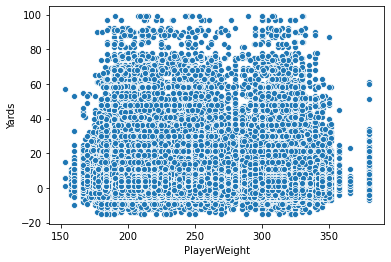

In [73]:
sns.scatterplot(x="PlayerWeight", y="Yards", data=train_df)

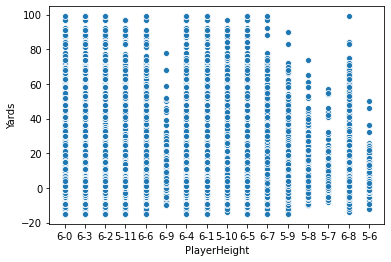

In [74]:
sns.scatterplot(x="PlayerHeight", y="Yards", data=train_df)

In [80]:
# See RB's with top avg yardage - one's that haven't played a lot will look like they're better RBs
rb_df_grouped = rb_df.groupby('DisplayName').aggregate('mean').sort_values(by = ['Yards'], ascending = False)
rb_df_grouped

,GameId,PlayId,X,Y,S,A,Dis,Orientation,Dir,NflId,...,Distance,HomeScoreBeforePlay,VisitorScoreBeforePlay,NflIdRusher,DefendersInTheBox,Yards,PlayerWeight,Week,Temperature,Humidity
DisplayName,,,,,,,,,,,,,,,,,,,,,
De'Angelo Henderson Sr.,2.018123e+09,2.018123e+13,46.240000,27.740000,4.985000,2.400000,0.490000,193.570000,198.790000,2557850.0,...,10.000000,33.000000,3.000000,2557850.00,6.500000,9.500000,208.0,17.000000,33.000000,42.000000
Reggie Bonnafon,2.019103e+09,2.019103e+13,64.602857,24.610000,3.820714,2.421429,0.375000,123.057143,125.037857,2561184.0,...,9.785714,27.000000,19.428571,2560506.00,7.428571,7.428571,215.0,6.571429,65.166667,36.071429
Kerrith Whyte,2.019112e+09,2.019112e+13,69.050000,28.608333,3.548333,3.218333,0.338333,134.678333,99.556667,2562830.0,...,10.500000,1.666667,1.666667,2562830.00,6.333333,7.166667,204.0,12.000000,46.000000,62.000000
Justin Davis,2.017778e+09,2.017778e+13,72.420000,23.733333,4.430000,2.516667,0.456667,94.556667,123.653333,2559163.0,...,7.000000,22.666667,7.000000,2559163.00,6.000000,6.666667,199.0,10.000000,59.666667,62.333333
Khari Blasingame,2.019112e+09,2.019112e+13,60.668750,26.700000,5.686250,1.542500,0.567500,170.838750,170.435000,2562869.0,...,9.000000,19.250000,7.750000,2548499.25,7.500000,6.500000,233.0,12.000000,52.000000,54.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Dexter Williams,2.019102e+09,2.019102e+13,101.140000,29.083333,4.363333,3.510000,0.426667,260.876667,256.050000,2562784.0,...,9.333333,42.000000,17.000000,2562784.00,7.666667,0.666667,212.0,7.000000,55.000000,74.000000
C.J. Spiller,2.017102e+09,2.017102e+13,56.265000,29.975000,2.885000,1.725000,0.385000,96.535000,194.015000,497204.0,...,10.000000,15.500000,16.500000,497204.00,5.500000,0.000000,200.0,7.000000,62.000000,78.000000
Devante Mays,2.017116e+09,2.017116e+13,58.526667,24.596667,3.556667,3.090000,0.456667,119.176667,222.446667,2558837.0,...,8.333333,0.000000,8.666667,2558837.00,6.333333,-0.333333,230.0,13.000000,41.333333,65.333333
